# Working with and visualising data

## Why write software to manage your data and plots? 


We should use programs for our entire research pipeline.

Not just main simulation or numerical code, but also the small scripts which we use to
tidy up data and produce plots. 

This should be code, so that the whole research pipeline
is recorded for reproducibility. Data manipulation in spreadsheets cannot be shared or
checked. 

It should be *good* code, because research conclusions are just as wrong if the
plotting script is wrong as if the code that generates the data is wrong.


## Analysing patient data


(The next few slides are taken from Software Carpentry materials and are (CC-BY) the contributors at
https://github.com/swcarpentry/bc/blob/master/team.md)

You can follow along in an [IPython Notebook](http://nbviewer.ipython.org/github/UCL/rsd-engineeringcourse/blob/staging/session01/notebooks/session1.ipynb)


## The data



Imagine you are studying inflammation in patients who have been given a new treatment for arthritis, 
and need to analyze the first dozen data sets. The data sets are stored in 
comma-separated values (CSV) format: 
each row holds information for a single patient, and the columns represent successive days. 
The first few rows of our first file look like this:


In [7]:
%%bash
head data/inflammation-01.csv

0,0,1,3,1,2,4,7,8,3,3,3,10,5,7,4,7,7,12,18,6,13,11,11,7,7,4,6,8,8,4,4,5,7,3,4,2,3,0,0
0,1,2,1,2,1,3,2,2,6,10,11,5,9,4,4,7,16,8,6,18,4,12,5,12,7,11,5,11,3,3,5,4,4,5,5,1,1,0,1
0,1,1,3,3,2,6,2,5,9,5,7,4,5,4,15,5,11,9,10,19,14,12,17,7,12,11,7,4,2,10,5,4,2,2,3,2,2,1,1
0,0,2,0,4,2,2,1,6,7,10,7,9,13,8,8,15,10,10,7,17,4,4,7,6,15,6,4,9,11,3,5,6,3,3,4,2,3,2,1
0,1,1,3,3,1,3,5,2,4,4,7,6,5,3,10,8,10,6,17,9,14,9,7,13,9,12,6,7,7,9,6,3,2,2,4,2,0,1,1
0,0,1,2,2,4,2,1,6,4,7,6,6,9,9,15,4,16,18,12,12,5,18,9,5,3,10,3,12,7,8,4,7,3,5,4,4,3,2,1
0,0,2,2,4,2,2,5,5,8,6,5,11,9,4,13,5,12,10,6,9,17,15,8,9,3,13,7,8,2,8,8,4,2,3,5,4,1,1,1
0,0,1,2,3,1,2,3,5,3,7,8,8,5,10,9,15,11,18,19,20,8,5,13,15,10,6,10,6,7,4,9,3,5,2,5,3,2,2,1
0,0,0,3,1,5,6,5,5,8,2,4,11,12,10,11,9,10,17,11,6,16,12,6,8,14,6,13,10,11,4,6,4,7,6,3,2,1,0,0
0,1,1,2,1,3,5,3,5,8,6,8,12,5,13,6,13,8,16,8,18,15,16,14,12,7,3,8,9,11,2,5,4,5,1,4,1,2,0,0


## The task


We want to:

*   load that data into memory,
*   calculate the average inflammation per day across all patients, and
*   plot the result.

This will give us a good overview of various concepts in Python, which we'll
return to some of after this initial survey.


##  Loading data


It's almost always wrong to do things yourself.

Someone's probably written a program already. 
Python makes it easy to find and use other people's libraries.

In this case, we want to use a python library to load and parse the csv data, and manipulate it as 
a matrix.




In [8]:
import numpy
data=numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
print data


[[ 0.  0.  1. ...,  3.  0.  0.]
 [ 0.  1.  2. ...,  1.  0.  1.]
 [ 0.  1.  1. ...,  2.  1.  1.]
 ..., 
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  2.  0.]
 [ 0.  0.  1. ...,  1.  1.  0.]]





Here we've called a **function** `loadtxt` from a **module** `numpy`, and
assigned it to a **variable** data. This course assumes you're happy with very basic
programming concepts like function and variable. The IPython notebook contains more detail.


## Types

In [9]:
print type(data)
print data.shape


<type 'numpy.ndarray'>
(60, 40)





We've jumped straight in and used a `numpy.ndarray` (numerical python) matrix type for our data.
It's similar to a basic python `Array` type; we'll talk more about the differences later.

For now, it's important to know that Python variables have a type, that different types behave differently,
but that, unlike C++ or Fortran, you don't need to say what type of variable something is before you use it.




In [10]:
print [type("Hello"),type(1), type([1,2,3])]


[<type 'str'>, <type 'int'>, <type 'list'>]


## Slicing


We can **slice** elements from arrays and matrices:




In [11]:
print 'first value in data:', data[0, 0] #Top left element
print data[0:4, 0:10] # Top left few elements
print data[:3, 36:] #First three lines, last few columns
print data[:-1,:] #All but the last line, all columns


first value in data: 0.0
[[ 0.  0.  1.  3.  1.  2.  4.  7.  8.  3.]
 [ 0.  1.  2.  1.  2.  1.  3.  2.  2.  6.]
 [ 0.  1.  1.  3.  3.  2.  6.  2.  5.  9.]
 [ 0.  0.  2.  0.  4.  2.  2.  1.  6.  7.]]
[[ 2.  3.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 2.  2.  1.  1.]]
[[ 0.  0.  1. ...,  3.  0.  0.]
 [ 0.  1.  2. ...,  1.  0.  1.]
 [ 0.  1.  1. ...,  2.  1.  1.]
 ..., 
 [ 0.  1.  1. ...,  2.  1.  1.]
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  2.  0.]]


## Methods


We can apply **methods** to objects. Which methods are available depend on the object's type:




In [12]:
print data.mean() # 6.14875
print data.std() # 4.613
patient_zero=data[0, :]
print 'maximum inflammation for patient 0:', patient_zero.max()
print 'maximum inflammation for patient 2:', data[2, :].max()


6.14875
4.61383319712
maximum inflammation for patient 0: 18.0
maximum inflammation for patient 2: 19.0


## Numpy Tools


Numpy provides cool tools like:




In [13]:
print data.mean(axis=1) # Average over days, per patient
print data.mean(axis=0) # Average over patients, per day


[ 5.45   5.425  6.1    5.9    5.55   6.225  5.975  6.65   6.625  6.525
  6.775  5.8    6.225  5.75   5.225  6.3    6.55   5.7    5.85   6.55
  5.775  5.825  6.175  6.1    5.8    6.425  6.05   6.025  6.175  6.55
  6.175  6.35   6.725  6.125  7.075  5.725  5.925  6.15   6.075  5.75
  5.975  5.725  6.3    5.9    6.75   5.925  7.225  6.15   5.95   6.275  5.7
  6.1    6.825  5.975  6.725  5.7    6.25   6.4    7.05   5.9  ]
[  0.           0.45         1.11666667   1.75         2.43333333   3.15
   3.8          3.88333333   5.23333333   5.51666667   5.95         5.9
   8.35         7.73333333   8.36666667   9.5          9.58333333
  10.63333333  11.56666667  12.35        13.25        11.96666667
  11.03333333  10.16666667  10.           8.66666667   9.15         7.25
   7.33333333   6.58333333   6.06666667   5.95         5.11666667   3.6
   3.3          3.56666667   2.48333333   1.5          1.13333333
   0.56666667]


## Plotting


> The purpose of computing is insight, not numbers
--- Richard Hamming


Tell IPython to show plots inline in the notebook


In [14]:
%matplotlib inline

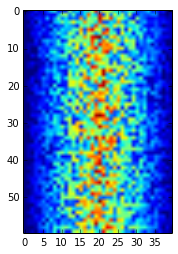

In [15]:
from matplotlib import pyplot as plt
plt.imshow(data)
plt.show()

## Something isn't right here

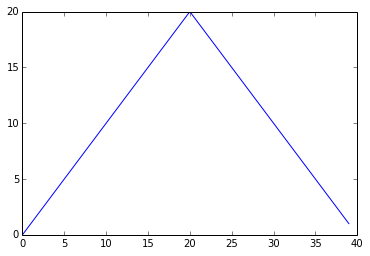

In [16]:
plt.plot(data.max(axis=0))
plt.show()

## Make it a function


So we've built some figures which help us analyse these data sets.

We know we're going to have lots of similar experiments, so we'll want to wrap the code up into a **function**
which can be used repeatedly:




In [17]:
import numpy as np
from matplotlib import pyplot as plt
def analyze(filename):
    data = np.loadtxt(fname=filename, delimiter=',')
    figure = plt.figure(figsize=(10.0, 3.0))

    subplot_average=figure.add_subplot(1, 3, 1)
    subplot_average.set_ylabel('average')
    subplot_average.plot(data.mean(0))

    subplot_max=figure.add_subplot(1, 3, 2)
    subplot_max.set_ylabel('max')
    subplot_max.plot(data.max(0))

    subplot_min=figure.add_subplot(1, 3, 3)
    subplot_min.set_ylabel('min')
    subplot_min.plot(data.min(0))

    figure.tight_layout()
    return figure





Note that the only way Python knows that we're done with our function block is by unindenting!


## User defined types. 


Note that the result of type(image) is `matplotlib.figure.Figure`: the `matplotlib` library defines
its own new type, called a `class`, with its own methods, like `add_subplot`.


## Make it a module


We'd like our function to be usable by other people. So we'll wrap it up as it's own module.
We copy it out of the notebook into a file, and add a wrapper function to make it easy to call it to
produce an output on disk instead of in a notebook:






In [18]:
%%writefile analyzer.py
#!/usr/bin/env python

import numpy as np
from matplotlib import pyplot as plt
def analyze(filename):
    data = np.loadtxt(fname=filename, delimiter=',')
    figure = plt.figure(figsize=(10.0, 3.0))

    subplot_average=figure.add_subplot(1, 3, 1)
    subplot_average.set_ylabel('average')
    subplot_average.plot(data.mean(0))

    subplot_max=figure.add_subplot(1, 3, 2)
    subplot_max.set_ylabel('max')
    subplot_max.plot(data.max(0))

    subplot_min=figure.add_subplot(1, 3, 3)
    subplot_min.set_ylabel('min')
    subplot_min.plot(data.min(0))

    figure.tight_layout()
    return figure

import os
def generate(filename, output=False):
    if not output:
        output = os.path.splitext(filename)[0] + '.png'
    analyze(filename).savefig(output)

def bulk_generate(sources):
    for source in sources:
       generate(source)

import sys
if __name__ == "__main__":
    bulk_generate(sys.argv[1:])


Writing analyzer.py


## Call from the command line


We'll also add some magic to make it work as a command line tool:



So now we can do:


In [1]:

%%bash

chmod u+x analyzer.py
./analyzer.py data/*.csv
open data/inflammation-01.png

/Library/Python/2.7/site-packages/matplotlib/tight_layout.py:225: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


![A figure](data/inflammation-01.png)



